# Loan Approval Prediction Using Machine Learning Algorithms

<b>- Importing the Libraries</b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics

<b>- Importing the dataset</b>

In [2]:
data = pd.read_csv("csv/loan_prediction.csv")
data.head(10)

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,5849,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,Graduate,No,6000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,Graduate,Yes,5417,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,Not Graduate,No,2333,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,Graduate,No,3036,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,Graduate,No,4006,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,Graduate,No,12841,349.0,360.0,1.0,Semiurban,N


<b>- screening and cleaning the data</b>

In [3]:
# info on dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           614 non-null    object 
 1   Gender            601 non-null    object 
 2   Married           611 non-null    object 
 3   Education         614 non-null    object 
 4   Self_Employed     582 non-null    object 
 5   ApplicantIncome   614 non-null    int64  
 6   LoanAmount        592 non-null    float64
 7   Loan_Amount_Term  600 non-null    float64
 8   Credit_History    564 non-null    float64
 9   Property_Area     614 non-null    object 
 10  Loan_Status       614 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 52.9+ KB


In [4]:
# count the number of missing values
data.isnull().sum()

Loan_ID              0
Gender              13
Married              3
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

In [5]:
# filling the missing values in "LoanAmount" by the mean
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

print("Done!, we fill the missing data of LoanAmount by the Mean")

Done!, we fill the missing data of LoanAmount by the Mean


In [6]:
# drop all the missing values
data.dropna(inplace=True)

print("Successfully dropped the missing values")

Successfully dropped the missing values


In [7]:
data.isnull().sum()

Loan_ID             0
Gender              0
Married             0
Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
dtype: int64

In [8]:
data.shape

(510, 11)

<b>Now we dropped the missing values, further we want to improve the data quality for the model. By replacing the categorical variable to numerical variable. It's done either by 
<ul>
    <li style="color:blue">using pandas</li>
    <li style="color:blue">from sklearn.preprocessing import LabelEncoder</li>
</ul>

I will demonstrate both the ways....</b>

In [9]:
# using replace method in pandas
data['Gender'].replace("Male",1, inplace=True)
data['Gender'].replace("Female",0, inplace=True)

print(data['Gender'].value_counts())

1    420
0     90
Name: Gender, dtype: int64


In [10]:
# using map method to replace in pandas
data['Married'] = data['Married'].map({'Yes':1,'No':0})
print(data['Married'].value_counts(),"\n")

data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0})
print(data['Education'].value_counts(),"\n")

data['Self_Employed'] = data['Self_Employed'].map({'Yes':1,'No':0})
print(data['Self_Employed'].value_counts(),"\n")

data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0})
print(data['Loan_Status'].value_counts())

1    331
0    179
Name: Married, dtype: int64 

1    402
0    108
Name: Education, dtype: int64 

0    440
1     70
Name: Self_Employed, dtype: int64 

1    346
0    164
Name: Loan_Status, dtype: int64


In [11]:
# using the labelencoder function in sklearn.preprocessing
# fitting the module
label = LabelEncoder().fit(data['Property_Area'])

# transforming it
label_t = label.transform(data['Property_Area'])
print(label_t,"\n")

# fit this to the dataframe
data['Property_Area'] = label_t

# label names
print("Labels: 0, 1, 2")
print("Represents:",label.classes_)

[2 0 2 2 2 2 2 1 2 1 2 2 0 2 2 2 0 2 2 1 1 1 2 2 2 0 1 0 2 1 2 1 2 2 1 2 2
 2 1 1 1 1 2 2 1 1 0 2 2 2 2 0 0 1 1 2 2 2 1 2 1 1 1 2 2 2 1 1 1 2 2 1 1 2
 1 1 1 2 1 1 1 1 1 1 2 1 2 1 2 2 2 1 2 1 0 1 0 2 0 1 1 1 0 0 2 2 1 1 1 1 0
 2 1 0 0 2 1 1 2 1 2 2 0 1 0 0 2 0 2 1 2 1 1 2 1 0 2 0 0 1 1 0 1 1 0 0 1 1
 2 2 1 1 1 1 0 0 0 1 2 1 0 1 0 2 1 1 2 2 1 1 2 0 2 1 1 1 2 0 2 1 0 1 2 1 1
 1 0 2 1 0 1 1 1 0 0 1 0 2 2 0 1 2 2 2 1 2 1 2 0 1 2 0 0 2 0 1 1 0 1 0 1 2
 2 2 2 0 1 1 1 1 2 1 2 1 2 2 0 0 1 0 1 0 0 1 2 2 1 1 2 0 2 2 1 0 2 0 2 0 2
 0 1 1 0 2 1 0 1 1 0 0 0 0 1 2 2 2 1 2 0 2 1 0 0 2 1 1 0 2 0 1 0 0 0 1 2 0
 2 2 1 1 1 2 0 0 1 1 0 1 1 0 2 2 0 2 2 1 2 2 2 1 2 2 0 0 0 1 2 2 2 0 1 2 0
 1 1 0 1 2 0 1 0 1 0 0 1 2 2 2 0 1 0 2 1 0 0 1 0 2 1 0 1 2 1 2 2 0 1 0 1 1
 0 0 0 0 0 0 1 1 2 2 0 1 2 0 1 0 2 2 1 0 1 0 0 1 1 2 0 0 1 1 1 0 0 2 1 2 0
 1 0 1 0 1 0 0 1 1 1 0 2 2 0 1 2 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 2 0 2 2
 1 0 0 1 1 2 0 1 0 1 0 0 0 2 2 0 1 1 1 1 1 1 0 1 2 2 0 2 2 2 2 2 1 1 2 2 0
 1 2 1 0 0 2 1 1 1 1 0 2 

<b>Dataset is ready!</b>

In [12]:
data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,1,0,5849,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,4583,128.000000,360.0,1.0,0,0
2,LP001005,1,1,1,1,3000,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,2583,120.000000,360.0,1.0,2,1
4,LP001008,1,0,1,0,6000,141.000000,360.0,1.0,2,1


<b>- Splitting the dataset</b>

In [13]:
x = data.iloc[:,1:10].values
y = data.iloc[:,10].values

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3)

# Creating the Logistic Regression Model

In [15]:
model = LogisticRegression(max_iter=200).fit(x_train, y_train)

y_predict = model.predict(x_test)

print("Y Predicted \n", y_predict,"\n")
print("Y Tested \n", y_test)

Y Predicted 
 [1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1] 

Y Tested 
 [0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0
 1 0 1 1 1]


<b>- Confusion matrix

In [16]:
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_predict))

Confusion Matrix:
[[ 22  25]
 [  1 105]]


In [17]:
tn, fp, fn, tp =metrics.confusion_matrix(y_test, y_predict).ravel()
tp

105

<b>- classification report based on confusion matrix 

In [18]:
print("classification Report:")
print(metrics.classification_report(y_test, y_predict))

classification Report:
              precision    recall  f1-score   support

           0       0.96      0.47      0.63        47
           1       0.81      0.99      0.89       106

    accuracy                           0.83       153
   macro avg       0.88      0.73      0.76       153
weighted avg       0.85      0.83      0.81       153



<b>Explanation</b>
- <u>Precision:</u> (Predictive Results) It Predicts Yes, How often it is correct.
- <u>Recall:</u> (Actual results) It's actually Yes, how often it is predict Yes.

Both the values should be high.

<b>- corrrelation value

In [19]:
data.corr()['Loan_Status']

Gender              0.055708
Married             0.100616
Education           0.095256
Self_Employed      -0.030379
ApplicantIncome    -0.039582
LoanAmount         -0.068681
Loan_Amount_Term   -0.007881
Credit_History      0.540639
Property_Area       0.014980
Loan_Status         1.000000
Name: Loan_Status, dtype: float64

In [20]:
print("Accuracy Score = ", metrics.accuracy_score(y_test, y_predict))

Accuracy Score =  0.8300653594771242


<b>CONCLUSION</b>
 - Credit History factor influence more
 - We Built good classification model and Got the accuracy score around 75%

Let's compare with other classifier algorithm

# Random Forest Classifier Model

In [21]:
# creating the random forest model
rf = RandomForestClassifier().fit(x_train, y_train)
y_predict_random = rf.predict(x_test)

# print the classification report
print(metrics.classification_report(y_test, y_predict_random))

              precision    recall  f1-score   support

           0       0.74      0.53      0.62        47
           1       0.82      0.92      0.86       106

    accuracy                           0.80       153
   macro avg       0.78      0.72      0.74       153
weighted avg       0.79      0.80      0.79       153



# Decision Tree classifier Model

In [22]:
# creating the decision tree model
dt = tree.DecisionTreeClassifier(criterion="gini").fit(x_train, y_train) 
y_predict_decision = dt.predict(x_test)

#tree.plot_tree(c)

#print the classification report
print(metrics.classification_report(y_test, y_predict_decision))

              precision    recall  f1-score   support

           0       0.55      0.60      0.57        47
           1       0.81      0.78      0.80       106

    accuracy                           0.73       153
   macro avg       0.68      0.69      0.68       153
weighted avg       0.73      0.73      0.73       153



<b>- Chart showing the comparison of accuracy score among the classifier's</b>

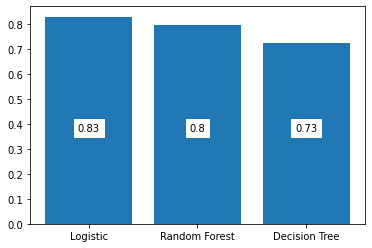

In [23]:
x_bar = ['Logistic', 'Random Forest', 'Decision Tree']
y_bar = [metrics.accuracy_score(y_test, y_predict), metrics.accuracy_score(y_test, y_predict_random), 
        metrics.accuracy_score(y_test, y_predict_decision)]
plt.bar(x_bar, y_bar)
plt.text(0, 0.37, round(metrics.accuracy_score(y_test, y_predict),2), ha= 'center',backgroundcolor='white')
plt.text(1, 0.37, round(metrics.accuracy_score(y_test, y_predict_random),2), ha= 'center',backgroundcolor='white')
plt.text(2, 0.37, round(metrics.accuracy_score(y_test, y_predict_decision),2), ha= 'center',backgroundcolor='white')
plt.show()

<p style="color:blue; font-size: 15px; text-align:center">- - - Almost all the algorithms used here, classify the outcome with the good accuracy score - - -</p>